<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_91_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 91: Hyperparameter Tuning

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Hyperparameter Tuning|
|||
|**Class Description**|A student learns to tune hyperparameters of a machine learning model and download Python, its frequently used packages and an IDE on their local machine|
|||
|**Class**|C91|
|||
|**Class Time**|55 minutes|
|||
|**Goal**|Build a regression model using SVR with the dummy dataset|
||Tune the hyperparameters such that a machine learning model makes the most accurate predictions on a dataset|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Teacher-Student Activities

In the previous classes, you learned to create a dummy dataset with python. In this class, you will learn to create a regression model using SVM. Also, you will get to learn to find the best values of parameters of a machine learning model so that it makes the most accurate predictions.

Let's quickly go through the activities covered in the previous class and start this lesson from **Activity 1: SVR - Model Building** section.



---

#### Support Vector Regression (SVR)

Support Vector Machines (SVM), other than classification, are used to solve regression problems as well by building models called **Support Vector Regressor (SVR)**. You already know that in regression we try to predict continuous numeric values.

In SVR, the idea is to enclose the errors between the actual and predicted values within a certain range of values called margins whereas in Linear Regression the idea is to minimise the sum of squared errors through the Ordinary Least Square (OLS) method.

Hence, in SVR we can define how much error is acceptable using the width of the margins.

SVR is used for both linear and non-linear regression.

Let's now learn to solve a regression problem through an SVR model. For that, let's first create a dummy DataFrame.

To create a dummy DataFrame for regression:

1. Create two arrays using the `make_regression()` function of the `sklearn.datasets` module. The syntax for the `make_regression()` function is as follows:

   **Syntax:** `make_regression(n_samples, n_features,  n_informative, n_targets,  random_state)`

   where,

   - `n_samples`- Determines the number of records to be generated in a dataset

   - `n_features` - Determines the number of features (or independent variables) to be generated in the dataset

- `n_informative` - Determines the number of features contributing to the prediction of the target variable required to build a regression model

- `n_targets` - Determines the number of target (or dependent) variables

- `random_state`- Determines whether the same set of random values to be generated over and over instead of new ones. An integer value of the `random_state` parameter will produce the same results across different function calls. Popular integer random seeds are 0 and 42

The function will return two arrays. You can store these two arrays in two variables, say `reg_feat` and `reg_target`, where the former contains features (or independent variables) and the latter contains the target or (dependent variable).

Let's create dummy data using the `make_regression()` function and print the number of rows and columns in the arrays created as the output of the function.


In [ ]:
# Create two arrays using the 'make_regression()' function and store them in the 'reg_feat' and 'reg_target' variables.
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

reg_feat, reg_target = make_regression(n_samples = 30, n_features = 5, n_informative = 2, n_targets = 1, random_state = 12)
# Why 30 samples? Recall that in CLT, we learnt that for at least 30 samples, the sampling distribution follows the normal distribution (bell curve)

# Print the object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
print(f"The features array has {reg_feat.shape[0]} rows and {reg_feat.shape[1]} columns.")
print(f"The target array has {reg_target.shape[0]} rows and {len(reg_target.shape)} column.")

The features array has 30 rows and 5 columns.
The target array has 30 rows and 1 column.


**Note:** The `make_regression()` function can take in more parameters that can be passed to create more customised data. You may refer to the following document:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html


In [ ]:
# Create a Pandas DataFrame containing the items from the 'reg_array' and 'reg_target' arrays.

# Create an empty dictionary
data_dict = {}

# Create a for loop to add the features (keys) and data in the dictionary
for i in range(reg_feat.shape[1]):
  data_dict["feature " + str(i + 1)] = reg_feat[:, i]

# Add the target key data in the dictionary
data_dict["target"] = reg_target

# Create DataFrame from the dictionary
reg_feat_df = pd.DataFrame(data = data_dict)
reg_feat_df

,feature 1,feature 2,feature 3,feature 4,feature 5,target
0,-0.641410,0.965746,-1.377596,-1.284003,-1.274572,-71.904143
1,0.232490,-1.148213,0.867612,2.114344,1.000943,36.584377
2,-1.589809,0.122762,-0.979526,1.689292,0.177750,-108.656346
3,0.073252,-0.713856,-0.997204,0.035416,-0.677945,-24.772374
4,-0.969176,-1.446359,0.871968,-0.536481,0.197921,-24.267594
5,-0.051415,-0.716264,0.159788,0.050523,-0.143337,1.956062
6,0.046403,1.407948,0.666078,0.051149,-0.935975,21.383991
7,0.943575,-0.083449,0.357644,0.677806,0.556060,58.097679
8,-0.571881,1.335831,-0.105862,0.318665,-0.337595,-32.043487
9,-0.397880,-0.688879,-1.259224,0.802630,0.272391,-56.164828


Now we have a `pandas` DataFrame having 30 records, 6 columns out of which 5 columns represent independent variables and 1 represent the target.


Let's print the descriptive statistics of the DataFrame.

In [ ]:
# Print the descriptive statistics of the dummy DataFrame
reg_feat_df.describe()

,feature 1,feature 2,feature 3,feature 4,feature 5,target
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.185371,-0.057523,-0.248670,-0.216668,0.206826,-16.510627
std,0.957741,1.117574,1.010759,1.282780,0.961081,65.992199
min,-2.213333,-2.619493,-2.091691,-3.147417,-1.274572,-160.358230
25%,-0.630513,-0.765778,-1.076305,-0.973893,-0.620386,-59.176002
50%,-0.113709,-0.033757,-0.110391,-0.315278,0.223562,-20.552637
75%,0.321624,0.884500,0.468765,0.475166,0.731732,27.757156
max,1.636463,2.241818,1.933216,3.041686,2.871819,119.038823


As it can be observed, the feature columns have almost the same range going from negative values to positive values.

Let's check whether the values in each column a follow normal distribution.

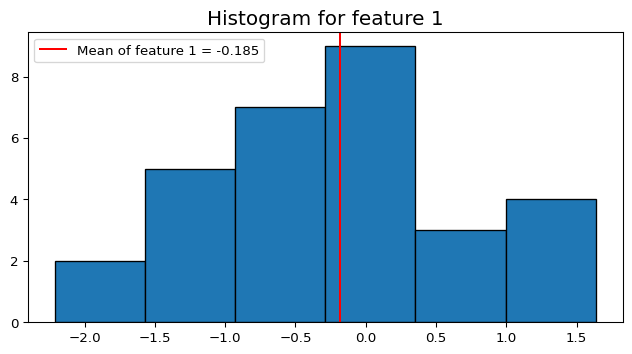

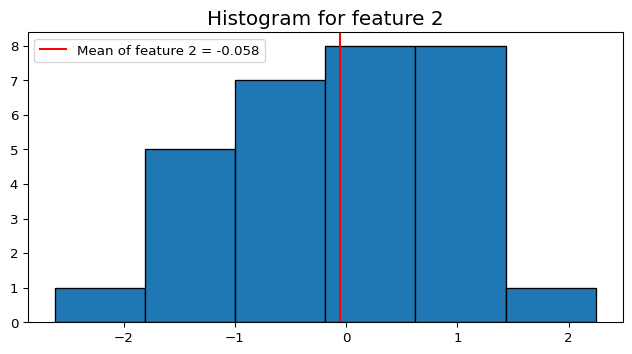

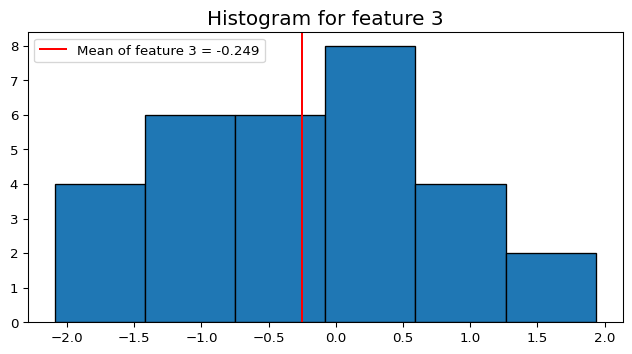

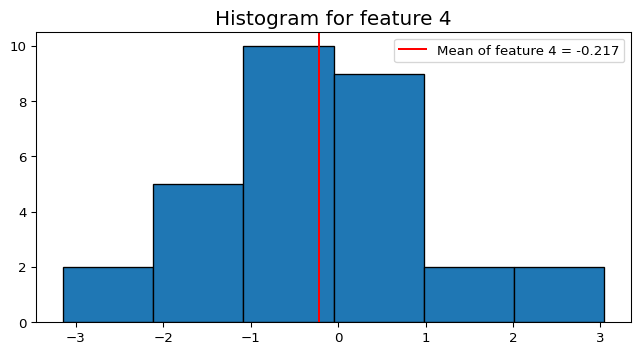

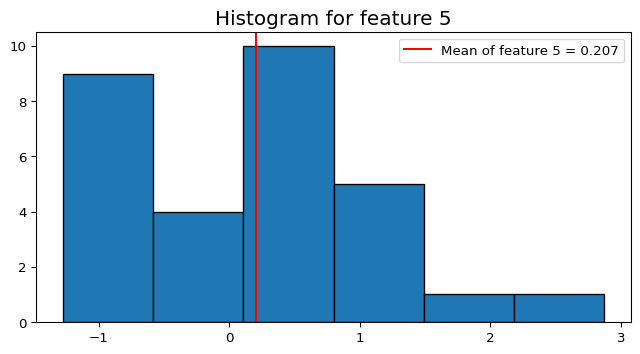

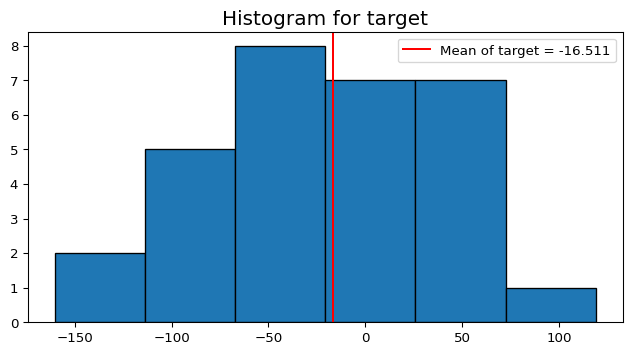

In [ ]:
# Create histograms for all the columns in the above data frame to check whether the values in each column follow a normal distribution.
import matplotlib.pyplot as plt
import seaborn as sns

for col in reg_feat_df.columns:
  plt.figure(figsize = (8, 4), dpi = 96)
  plt.title(f"Histogram for {col}", fontsize = 15)
  plt.hist(reg_feat_df[col], bins = "sturges", edgecolor = "black")
  plt.axvline(np.mean(reg_feat_df[col]), color = "red", label = f"Mean of {col} = {np.mean(reg_feat_df[col]):.3f}")
  plt.legend()
  plt.show()

We can see that all the values in each column somewhat follow a normal distribution. This will become more apparent if we increase the number of samples in the data frame.

Now, let's move ahead and check the correlation between the feature and target columns.

Let's plot check the collinearity of the `target` column with independent features.

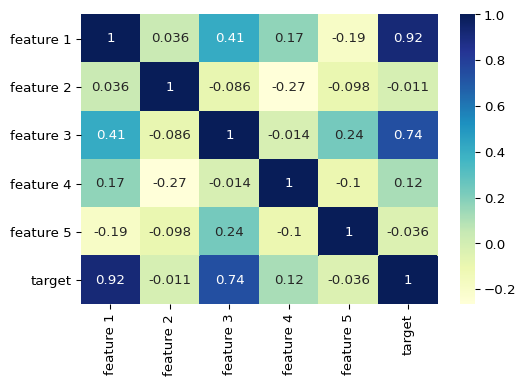

In [ ]:
# Create a heatmap for the correlation coefficient of DataFrame.
plt.figure(figsize = (6, 4), dpi = 96)
sns.heatmap(data = reg_feat_df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In the above graph, we can see that only `feature 1` and `feature 3` have a strong correlation with `target` columns with the correlation coefficient values `0.92` and `0.74` respectively. That means possibly only these two features will be useful to build a good regression model to predict the `target` values. Also, note that `feature 1` and `feature 3` are also correlated with each other. This means there is a scope of multicollinearity.

**Note:** The reason for only two columns having strong collinearity with the target column is `n_informative = 2` parameter while creating dummy data.

Let's observe the independent features `feature 1` and `feature 3` individually with the `target` column.


Let's create a `regplot` between `feature 1` and the `target` column to observe the relationships and best-fit regression line:

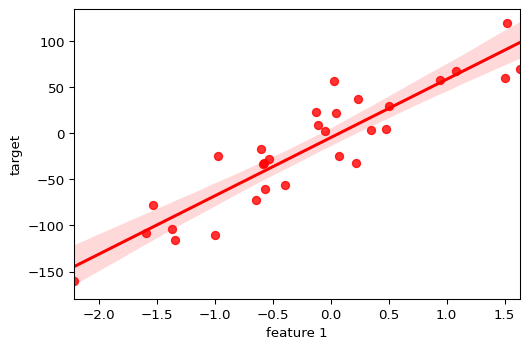

In [ ]:
# Create a regplot between 'feature' and 'target' columns.
plt.figure(figsize = (6, 4), dpi = 96)
sns.regplot(x = "feature 1", y = "target", data = reg_feat_df, color = "r")
plt.show()

As it can be observed, a positive correlation because $R=0.92$.

Let's create a `regplot` between `feature 3` and the `target` column to observe the relationships and best-fit regression line:



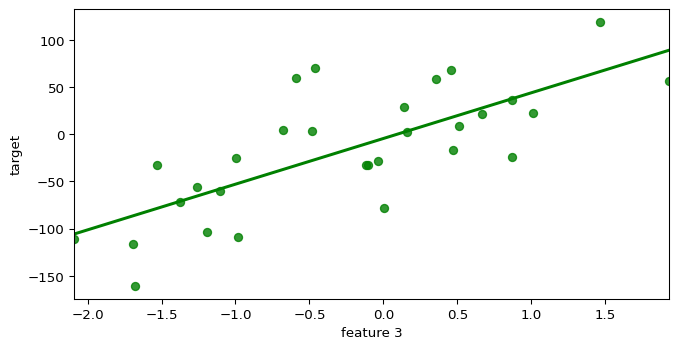

In [ ]:
# Create a regplot between 'feature 3' and 'target' columns.
plt.figure(figsize = (8, 4), dpi = 96)
sns.regplot(x = "feature 3", y = "target", data = reg_feat_df, color = "g", ci = None) # The 'ci = None' parameter removes the shaded region.
plt.show()

As it can be observed, the correlation is positive but the points are more scattered than the `feature 1` graph as the $R=0.74$ which is less than the $R$ value for `feature 1`.

**Note:**

- `ci` stands for **confidence interval** that tells the number of values it can predict with confidence. The values outside CI are predicted by chance.

- A 95% confidence interval (CI) suggests that 95% of the target values are predicted by regression and the remaining 5% by chance (or fluke).

- The other way to look at CI is to calculate the **p-value**. When we say the p-value is less than 0.05, it means that less than 5% of the target values are predicted by chance (or fluke).

Now, without any further ado, let's create the model to make target predictions with `feature 1` and `feature 3` **Activity 1: SVR - Model Building**

---

#### Activity 1: SVR - Model Building


Let's split the feature and target columns to create a regression model using SVM with the independent features that are `feature 1` and `feature 3` and target variable as the `target`.

1. Create feature DataFrame `reg_feat_df` by selecting only two independent features i.e., `feature 1` and `feature 3`.

2. Using the `train_test_split()` function, split the data (`reg_feat_df` and `reg_target`) into training and testing sets such that the test set has 30% of the total samples.

3. Print the number of rows and columns in the training and testing feature and target dataset.

In [ ]:
# S1.1: Create training and testing DataFrame by splitting the original data.

# Create the feature DataFrame
from sklearn.model_selection import train_test_split

reg_feat_df = reg_feat_df[["feature 1", "feature 3"]]
reg_feat_df.head()

# Split the data
features_train, features_test, target_train, target_test = train_test_split(reg_feat_df, reg_target, test_size = 0.3, random_state = 8)

print("Shape of train features:", features_train.shape, "\nShape of test features:", features_test.shape, "\n")
print("Shape of train target:", target_train.shape, "\nShape of test target:", target_test.shape)

Shape of train features: (21, 2) 
Shape of test features: (9, 2) 

Shape of train target: (21,) 
Shape of test target: (9,)


Now that we have the data split, let's create an SVR model. To do this:

1. Import `SVR` class from the `sklearn.svm` module.

2. Create an object of the `SVR` class, say `svr_lin` and pass `kernel = "linear"` as input to its constructor so that the linear kernel can determine the best fit line (hyperplane).

3. Call the `fit()` function of the `SVC` class on the object created and pass `X_train` and `y_train` as inputs to the function.

4. Print the regression coefficient values using the `intercept_` and `coef_` attributes of the model.

5. Print the $R^2$ score of the model using the `score()` function of the `SVR` class. It takes both the features and target set as inputs.



In [ ]:
# S1.2: Build an SVR model on the 'feature_train' and 'target_train' dataset with the linear kernel.
# Import the module
from sklearn.svm import SVR

# Create the model
svr_lin = SVR(kernel = "linear")
svr_lin.fit(features_train, target_train)

# Print the coefficients
print(svr_lin.intercept_)
print(svr_lin.coef_)

# Print the model score
print(svr_lin.score(features_train, target_train))

[-14.29713499]
[[13.58668726 11.60293546]]
0.5223975576245091


We can see that the model score is `0.52` that is almost half of the best possible score.

Let's evaluate the model by calculating the $R^2$, MSE, RMSE and MAE values that you already learnt in the **Simple Linear Regression - Residual Analysis** lesson.


In [ ]:
# S1.3: Evaluate the SVR model built above using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target_train_pred = svr_lin.predict(features_train)
target_test_pred = svr_lin.predict(features_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(target_train, target_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(target_train, target_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(target_train, target_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(target_train, target_train_pred):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(target_test, target_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(target_test, target_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(target_test, target_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(target_test, target_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.522
Mean Squared Error: 1825.346
Root Mean Squared Error: 42.724
Mean Absolute Error: 33.419


Test Set
--------------------------------------------------
R-squared: 0.509
Mean Squared Error: 2427.332
Root Mean Squared Error: 49.268
Mean Absolute Error: 42.513


For a highly accurate regression model:

- The $R^2$ squared value should be close to 1.

- The MSE, RMSE and MAE values should be close to zero.

As it can be observed, $R^2$ squared value is low for both the train and test sets.

Before making any conclusion about the model, let's analyse the residuals to further evaluate the model.

Let us plot the histogram of the error terms for the train and test sets and see what it looks like.

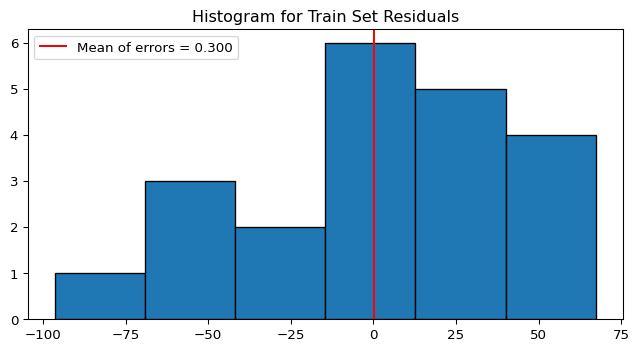

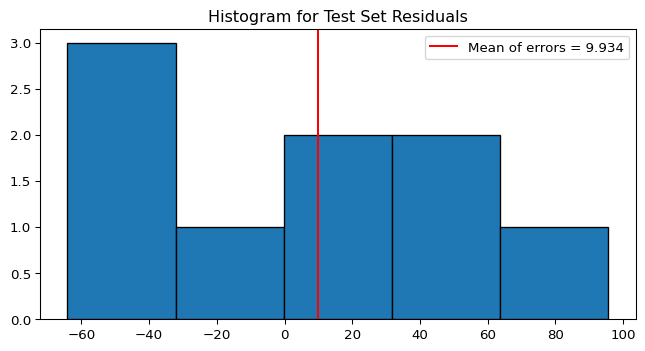

In [ ]:
# S1.4: Create a histogram for the errors obtained in the predicted values for both the train and test set.

# Calculate the errors obtained in the training set
errors_train = target_train - target_train_pred

# Create a histogram for the errors obtained in the predicted values for the train set.
plt.figure(figsize = (8, 4), dpi = 96)
plt.hist(errors_train, bins = 'sturges', edgecolor = 'black')
plt.title("Histogram for Train Set Residuals")
plt.axvline(x = errors_train.mean(), label = f"Mean of errors = {errors_train.mean():.3f}", color = 'r')
plt.legend()
plt.show()

# Calculate the errors obtained in the testing set
errors_test = target_test - target_test_pred

# Create a histogram for the errors obtained in the predicted values for the test set.
plt.figure(figsize = (8, 4), dpi = 96)
plt.hist(errors_test, bins = 'sturges', edgecolor = 'black')
plt.title("Histogram for Test Set Residuals")
plt.axvline(x = errors_test.mean(), label = f"Mean of errors = {errors_test.mean():.3f}", color = 'r')
plt.legend()
plt.show()

Here the mean of errors obtained for the train and test sets is **non-zero**  because the residuals (errors) do not follow a normal distribution. All-in-all, this model is poor because of the following reasons:

- The $R^2$ value is low
- MSE, RMSE and MAE values are high
- The mean of the residuals is not zero

**Note:** We cannot calculate MSLE values as the `target` column has negative values.

Let's create the model again with the polynomial kernel and evaluate the model again.

In [ ]:
# S1.5: Build an SVR model on the 'feature_train' and 'target_train' dataset using the polynomial kernel.
# Create the model
svr_poly = SVR(kernel = "poly", degree = 2) # The value of the 'degree' parameter is arbitrarily chosen. You may choose any arbitrary value.
svr_poly.fit(features_train, target_train)

# Print the intercept
print(svr_poly.intercept_)

# Print the model score
print(svr_poly.score(features_train, target_train))

[-22.32986553]
0.23444211345083943


The $R^2$ score here is `0.23` even lower than the linear model. Let's create an SVR model again with but with the RBF kernel this time.

In [ ]:
# S1.6: Build an SVR model on the 'feature_train' and 'target_train' dataset using the RBF kernel.
# Create the model
svr_rbf = SVR(kernel = "rbf")
svr_rbf.fit(features_train, target_train)

# Print the intercept
print(svr_rbf.intercept_)

# Print the model score
print(svr_rbf.score(features_train, target_train))

[-23.08841316]
0.08623240360484286


As it can be observed, the above SVR model also has a very low score.

In this case, to get the best SVR model for this data, we need to tune its parameters using the process called **hyperparameter tuning**.

----

#### Activity 2: Hyperparameter Tuning Using `GridSearchCV` Module

Hyperparameter tuning is the process to optimise the values of the parameters of any machine learning model so that it can produce the most accurate predictions. This process is very similar to finding the right frequency band to connect with a radio station.

The most important parameters in SVM, apart from `kernel`, are `C` and `gamma` where:

- `C` controls the error rate of an SVM model by adjusting the width of the margins wrt a hyperplane. A smaller `C` value will result in a larger margin whereas a larger `C` value will result in a smaller margin.

- `gamma` defines the curvature of a non-linear hyperplane in an SVM model. A larger `gamma` value will cause a wiggly decision boundary whereas a smaller `gamma` value will cause a straighter decision boundary.

To find the best possible values of `C` and `gamma` parameters, you can use the `GridSearchCV` class of the `sklearn.model_selection` model.

If uses the `fit()` function to iterate through the list of model parameter values and to fit the model on the training set. Thereafter, you can select the best parameters to finally build a model with the best possible parameter values. To do this, you need to:

1. Import the `GridSearchCV` class from the `sklearn.model_selection` module.

2. Create a dictionary and store it in a variable say `parameter` to create the list of parameters to be tuned. Inside the dictionary:

  - Insert the keys as the model parameter i.e., `kernel`, `C` and `gamma`
  - Insert the corresponding values to the above keys i.e.

    ```
      parameters = {'kernel': ('linear', 'rbf', 'poly'),
                  'C': [0.01, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}
    ```

3. Create an object of `GridSearchCV` class and store it in a variable, say `svr_reg_grid`. Provide the following inputs to its constructor:

   - `estimator`: The model to be tuned. Here, `SVR()`
   
   - `parameter`: The dictionary containing the parameters to be tuned.
   
   - `verbose = 2`: This controls the number of messages displayed (the higher the value, the more messages).

4. Call the `fit()` function on the  `GridSearchCV` object created above with the train set as inputs.

This is a brute-force method of finding the right estimators because we choose their arbitrary values and try to fit them one by one with a different combination.

**Note:** The hyperparameter tuning is a computationally heavy exercise and hence takes a lot of time. So it is recommended to select **"GPU"** as a hardware accelerator. To do this go to the **Edit**, then **Notebook Settings**, then select **Hardware** and finally select **GPU**.



In [ ]:
# S2.1: Tune the hyperparameters of an SVR model on the 'features_train' and 'target_train' sets.

# Import the module
from sklearn.model_selection import GridSearchCV

# Create the parameter dictionary.
parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.01, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}

# Create the 'GridSearchCV' object.
svr_grid_search = GridSearchCV(SVR(), parameters, verbose = 2)

# Fit the training data.
svr_grid_search.fit(features_train, target_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ................ C=0.01, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.01, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.01, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.01, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

Now that the search is finished, let's get the best parameter values using the `best_estimator_` attribute of the `GridSearchCV` class.

In [ ]:
# S2.2: Print the values of the parameters that return the best SVR model.
print(svr_grid_search.best_estimator_)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


So the best possible values of the parameters `kernel, C, degree` and `gamma` are `'linear', 100, 3` and `0.01` respectively.

Let's use these values to create an SVR model again.

In [ ]:
# S2.3: Create an SVR model with the best parameter values calculated above.
svr_best = SVR(kernel = 'linear', C = 100, degree = 3, gamma = 0.01)
svr_best.fit(features_train, target_train)
print(svr_best.score(features_train, target_train))

0.9999990997780305


As we can see, the $R^2$ score of the model is `99.99%` .

Let's evaluate the new model by making predictions on the train and test sets.


In [ ]:
# S2.4: Evaluate the SVR model using the 'r2_score', 'mean_squared_error' and 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

target_train_pred_final = svr_best.predict(features_train)
target_test_pred_final = svr_best.predict(features_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(target_train, target_train_pred_final):.3f}")
print(f"Mean Squared Error: {mean_squared_error(target_train, target_train_pred_final):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(target_train, target_train_pred_final)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(target_train, target_train_pred_final):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(target_test, target_test_pred_final):.3f}")
print(f"Mean Squared Error: {mean_squared_error(target_test, target_test_pred_final):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(target_test, target_test_pred_final)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(target_test, target_test_pred_final):.3f}")

Train Set
--------------------------------------------------
R-squared: 1.000
Mean Squared Error: 0.003
Root Mean Squared Error: 0.059
Mean Absolute Error: 0.049


Test Set
--------------------------------------------------
R-squared: 1.000
Mean Squared Error: 0.005
Root Mean Squared Error: 0.072
Mean Absolute Error: 0.061


As it can be observed, the $R^2$ is `1` and the MSE, RMSE and MAE values are also very low.

Let's analyse the residuals to further evaluate the efficacy of the model.

Let us plot the histogram for the residuals obtained for the train and test sets.



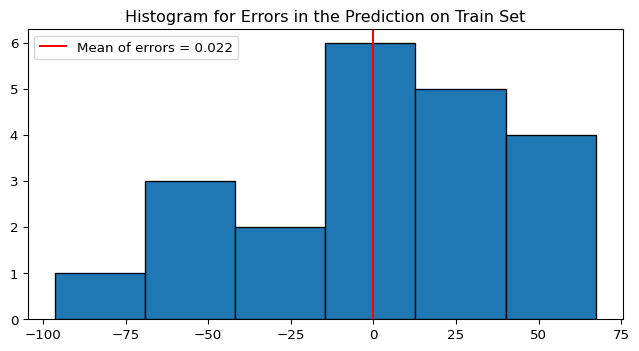

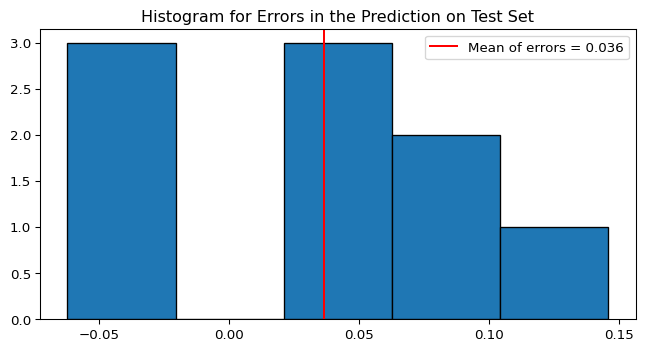

In [ ]:
# S2.5: Create histograms for the errors obtained between the predicted and actual target values for the train and test set.
# Calculate the errors obtained for the train set.
errors_train_final = target_train - target_train_pred_final

# Create a histogram for the errors obtained between the predicted and actual target values for the train set.
plt.figure(figsize = (8, 4), dpi = 96)
plt.hist(errors_train, bins = 'sturges', edgecolor = 'black')
plt.title("Histogram for Errors in the Prediction on Train Set")
plt.axvline(x = errors_train_final.mean(), label = f"Mean of errors = {errors_train_final.mean():.3f}", color = 'r')
plt.legend()
plt.show()

# Calculate the errors obtained for the test set
errors_test_final = target_test - target_test_pred_final

# Create a histogram for the errors obtained between the predicted and actual target values for the test set.
plt.figure(figsize = (8, 4), dpi = 96)
plt.hist(errors_test_final, bins = 'sturges', edgecolor = 'black')
plt.title("Histogram for Errors in the Prediction on Test Set")
plt.axvline(x = errors_test_final.mean(), label = f"Mean of errors = {errors_test_final.mean():.3f}", color = 'r')
plt.legend()
plt.show()

Here, the mean of errors obtained in the predictions for the train and test sets are very close to **zero**.

For one final check, let's create a scatter plot between the actual and predicted targets for the train and test set.


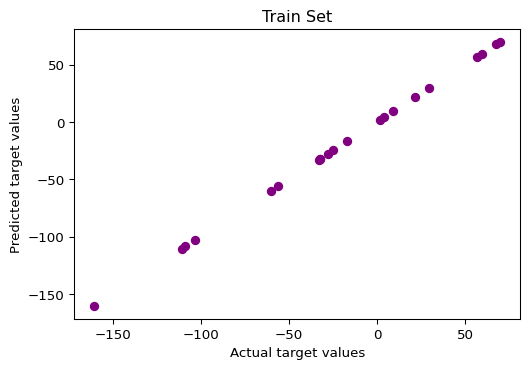

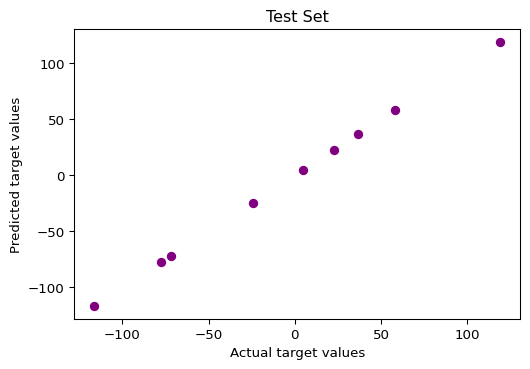

In [ ]:
# S2.6: Create a scatter plot between the actual and the predicted targets for the train and test sets.

# Create a scatter plot between the actual and predicted targets for the train set.
plt.figure(figsize = (6, 4), dpi = 96)
plt.scatter(x = target_train, y = target_train_pred_final, color = "purple")
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values")
plt.title("Train Set")
plt.show()

# Create a scatter plot between the actual and predicted targets for the test set.
plt.figure(figsize = (6, 4), dpi = 96)
plt.scatter(x = target_test, y = target_test_pred_final, color = "purple")
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values")
plt.title("Test Set")
plt.show()

As we can observe, the actual and predicted target values create a straight linear line. Hence, we can conclude the SVR model created is accurate.

Let's stop here. You will learn to install Python and Sublime Text code editor in your personal computer in the next class.

----

#### Activities

**Teacher Activities:**

1. Hyperparameter Tuning (Class Copy)

   https://colab.research.google.com/drive/1tI60PbgyO6sn_7zaieLh-EXbvK8s_aqx
   
2. Hyperparameter Tuning (Reference)
   
   https://colab.research.google.com/drive/1_RGroNjGOAMx_B_GqRjnPi4liqNIrP1c
   

---